In [ ]:
!pip install catboost
import requests
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd
import os
import joblib

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


#machine learning Algorithms For Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.8 MB/s eta 0:00:00


In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [ ]:
data = pd.concat([X, y], axis=1)
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.isnull().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day_of_week,0


In [ ]:

# Calculate the percentage of null values in each column
null_percentage = data.isnull().sum() / len(data) * 100

# Set a threshold for null values (e.g., 50%)
threshold = 50

# Identify columns with more than the threshold percentage of null values
columns_to_drop = null_percentage[null_percentage > threshold].index
print(columns_to_drop)
# Drop the identified columns
data = data.drop(columns=columns_to_drop)


Index(['poutcome'], dtype='object')


In [ ]:


# Handle missing values (NaNs)
for col in data.columns:
    if data[col].dtype == 'object':  # Categorical features
        data[col] = data[col].fillna(data[col].mode()[0]) # Fill with mode
    else:  # Numerical features
        data[col] = data[col].fillna(data[col].mean()) # Fill with mean

data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day_of_week,0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  y            45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [ ]:
# prompt: display unique value for object columns

for col in data.columns:
    if data[col].dtype == 'object':
        print(f"Unique values for column '{col}':")
        print(data[col].unique())
        print("-" * 20)



Unique values for column 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
--------------------
Unique values for column 'marital':
['married' 'single' 'divorced']
--------------------
Unique values for column 'education':
['tertiary' 'secondary' 'primary']
--------------------
Unique values for column 'default':
['no' 'yes']
--------------------
Unique values for column 'housing':
['yes' 'no']
--------------------
Unique values for column 'loan':
['no' 'yes']
--------------------
Unique values for column 'contact':
['cellular' 'telephone']
--------------------
Unique values for column 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
--------------------
Unique values for column 'y':
['no' 'yes']
--------------------


In [ ]:

# Initialize LabelEncoder
label_encoder = LabelEncoder()
columns_used_for_One_hot_encode = []
columns_used_for_label_encoder= []

for col in data.columns:
    if data[col].dtype == 'object':
        # Check if the column has more than 2 unique values
        if len(data[col].unique()) > 2:
            # One-hot encode columns with more than two unique values
            data = pd.get_dummies(data, columns=[col], prefix=col)
            columns_used_for_One_hot_encode.append(col)
            joblib.dump(label_encoder, f'One_hot_encode_{col}.joblib')
        else:
            # Label encode binary columns (two unique values)
            data[col] = label_encoder.fit_transform(data[col])
            columns_used_for_label_encoder.append(col)
            joblib.dump(label_encoder, f'label_encoder_{col}.joblib')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   contact              45211 non-null  int64
 6   day_of_week          45211 non-null  int64
 7   duration             45211 non-null  int64
 8   campaign             45211 non-null  int64
 9   pdays                45211 non-null  int64
 10  previous             45211 non-null  int64
 11  y                    45211 non-null  int64
 12  job_admin.           45211 non-null  bool 
 13  job_blue-collar      45211 non-null  bool 
 14  job_entrepreneur     45211 non-null  bool 
 15  job_housemaid        45211 non-null  bool 
 16  job_management       4

In [ ]:
data.describe()

,age,default,balance,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,0.064276,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,0.245247,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


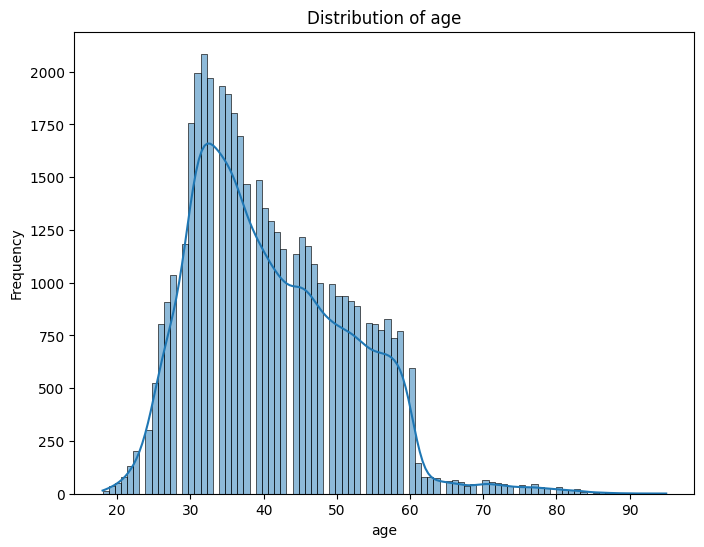

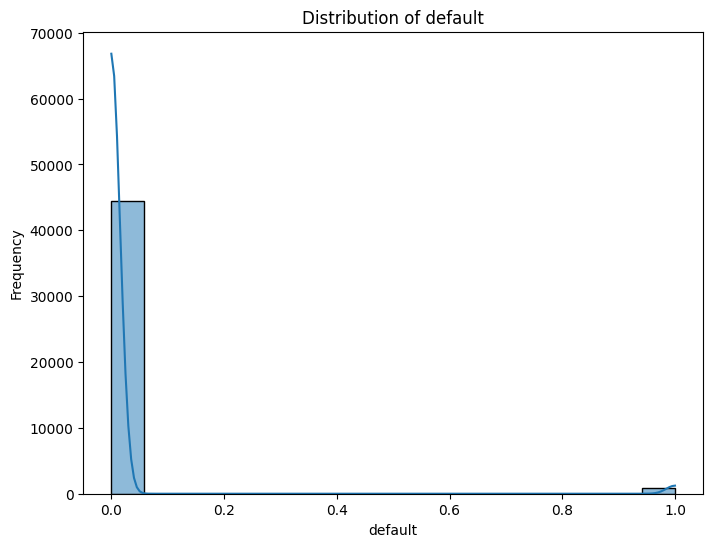

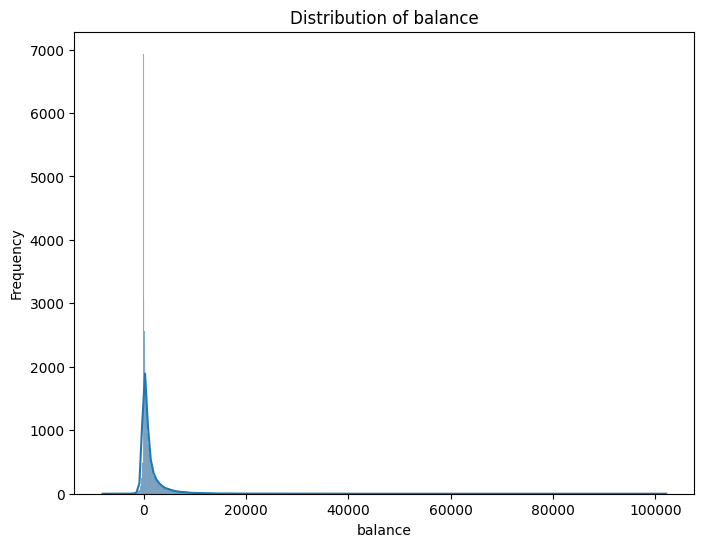

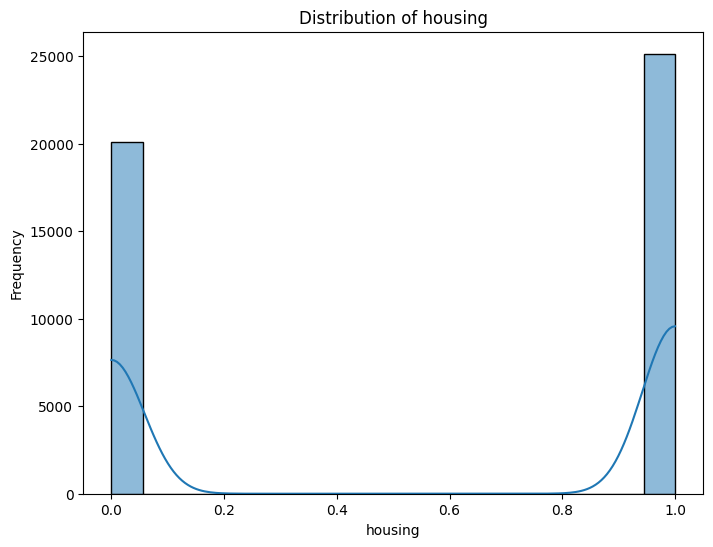

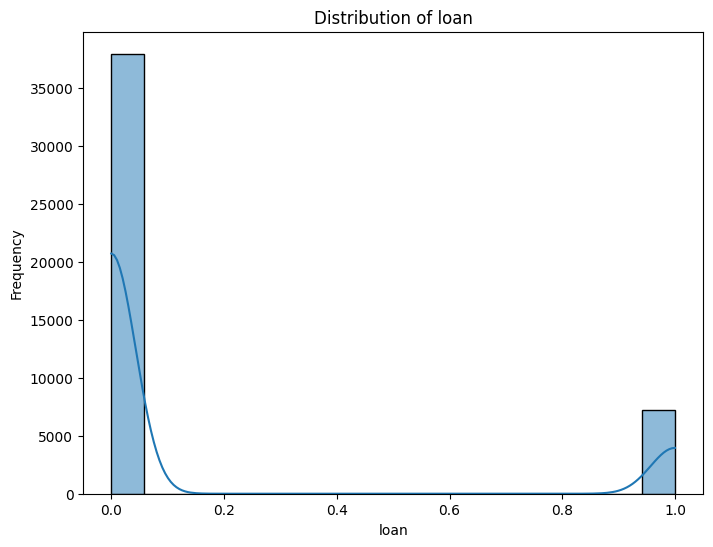

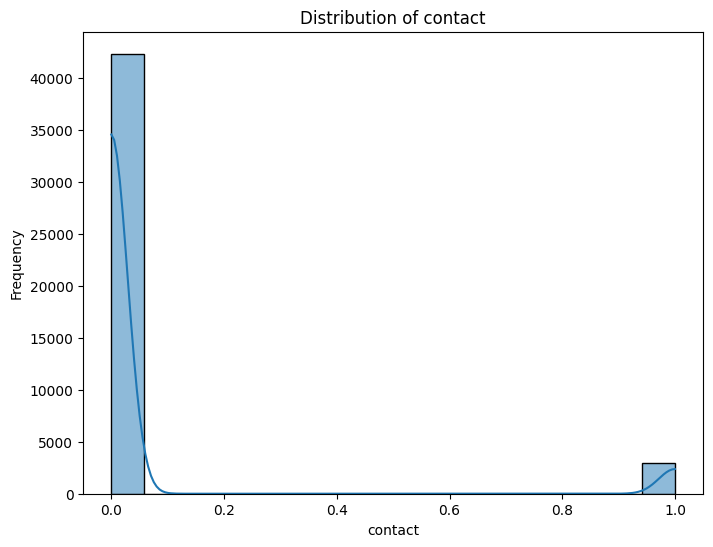

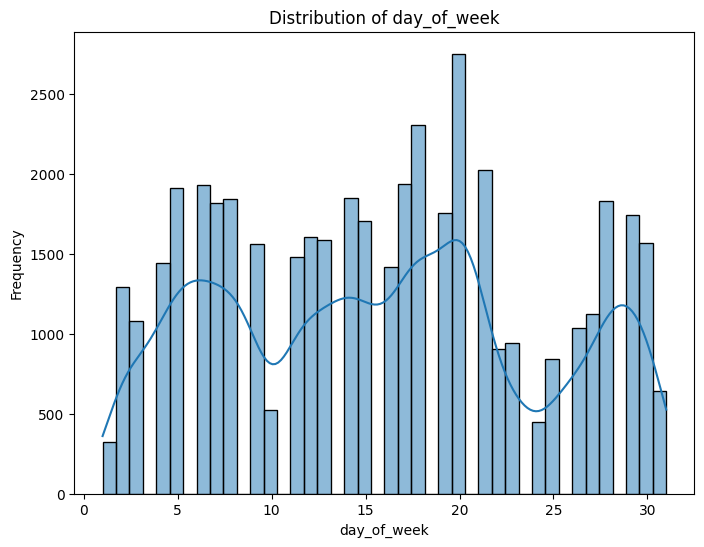

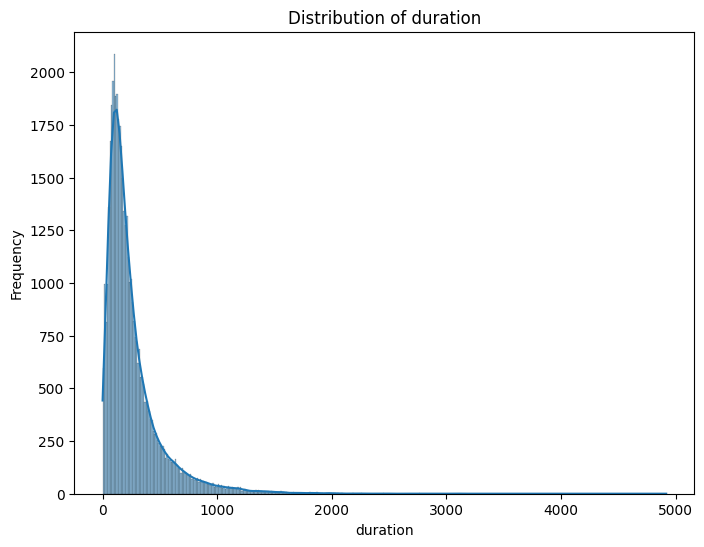

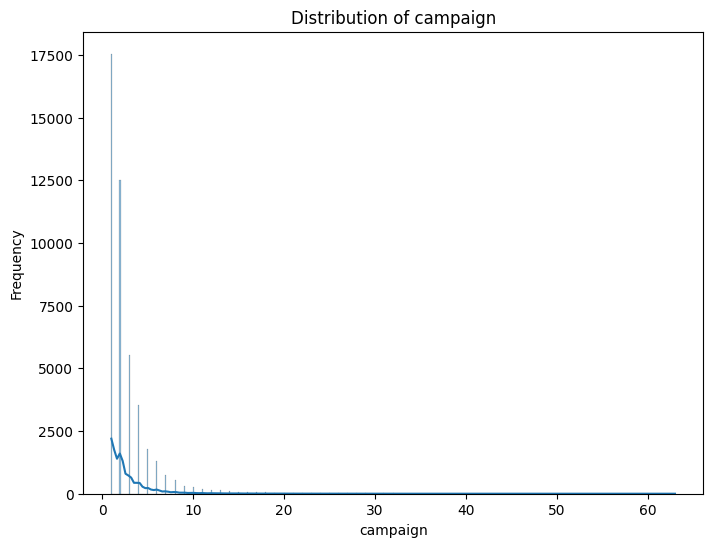

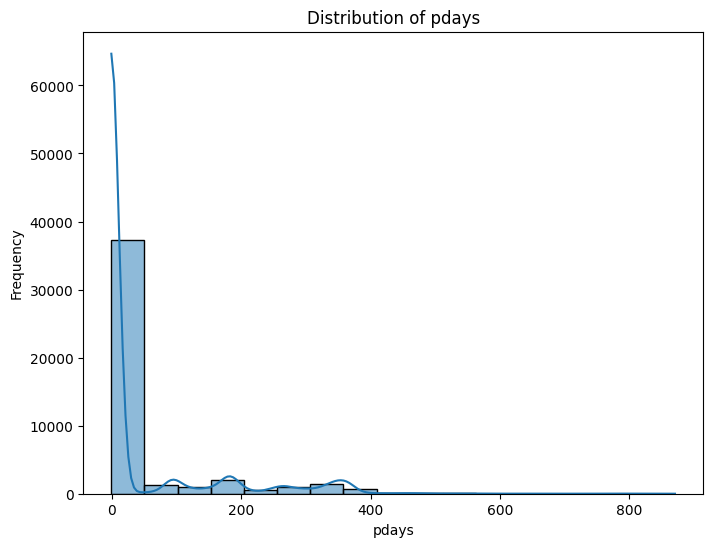

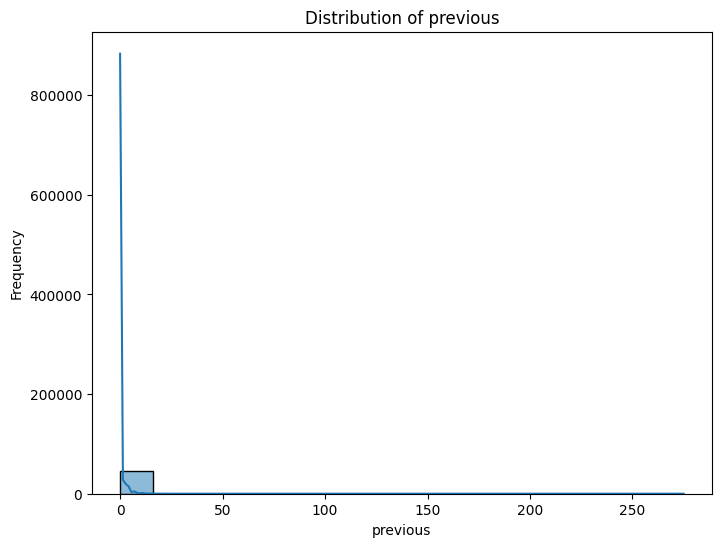

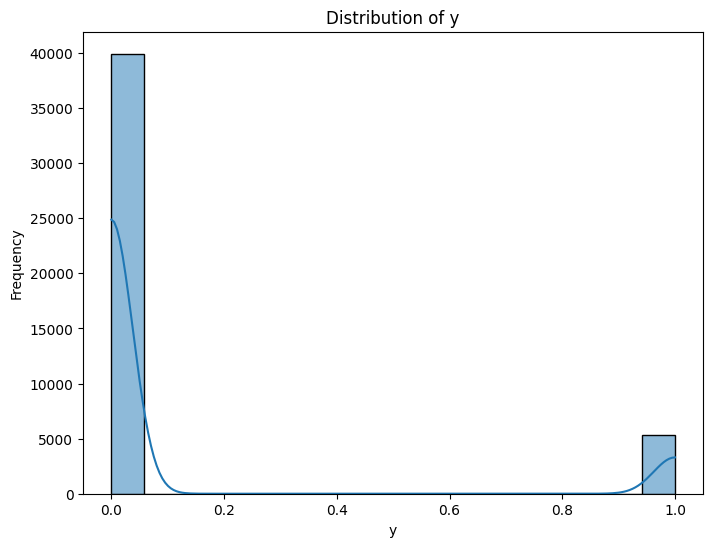

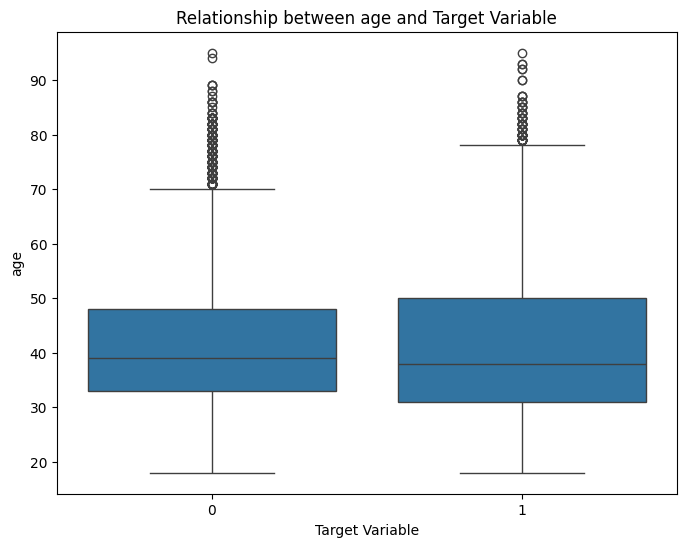

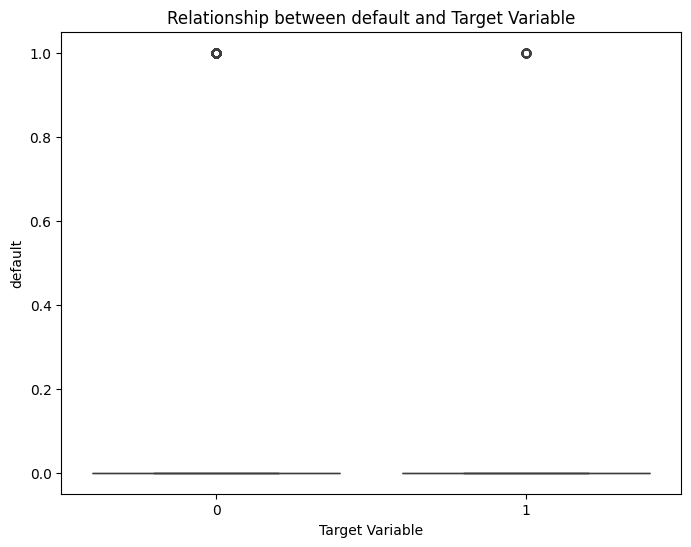

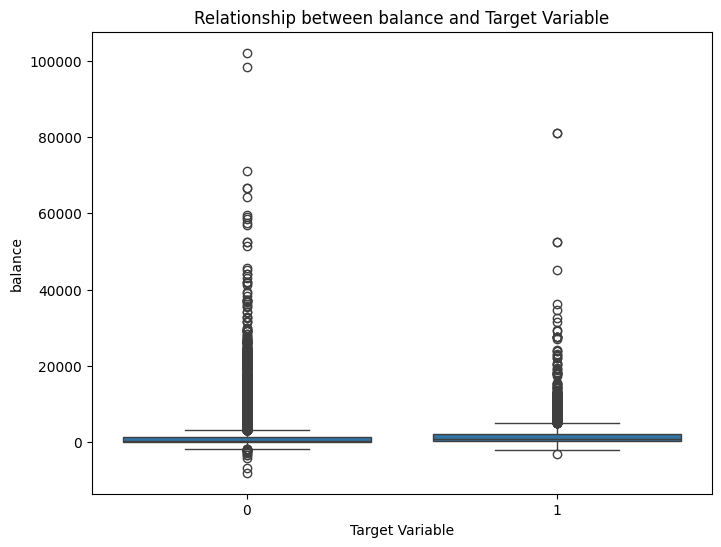

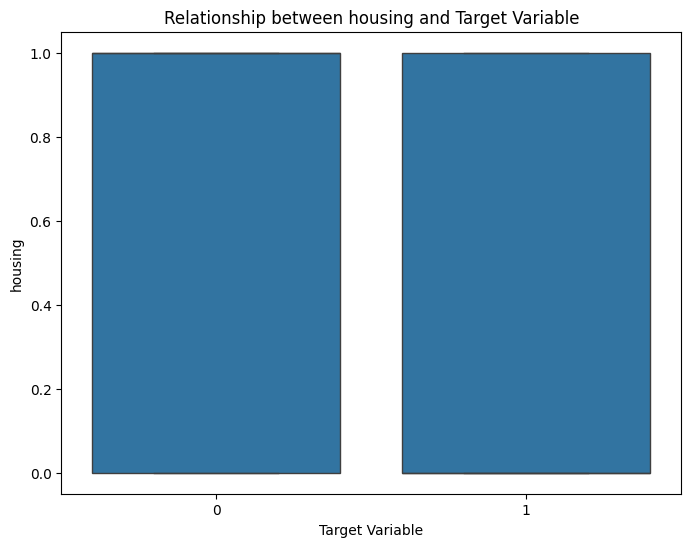

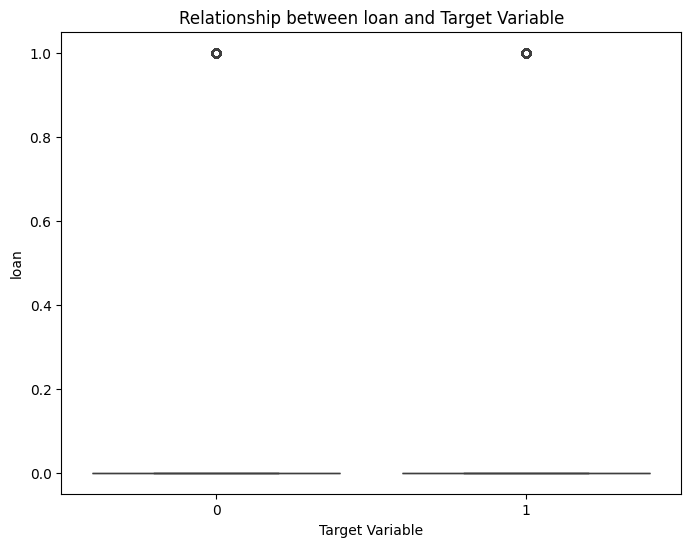

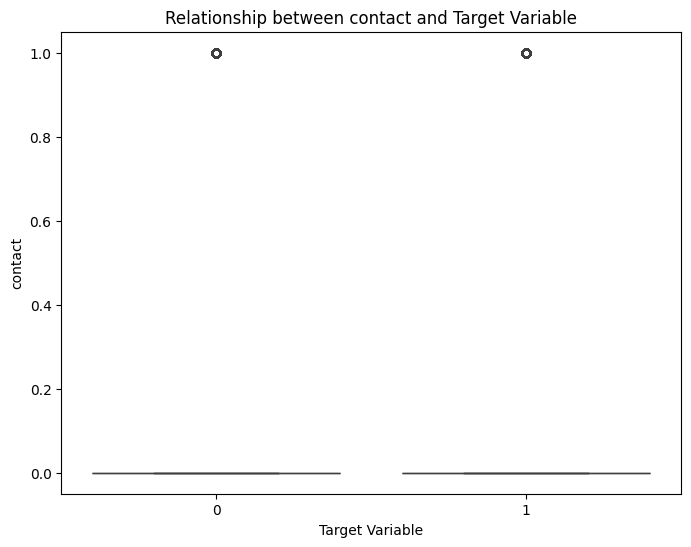

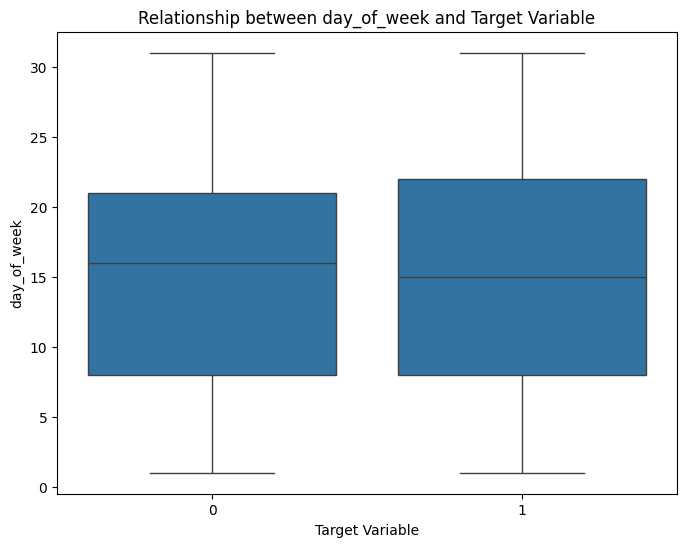

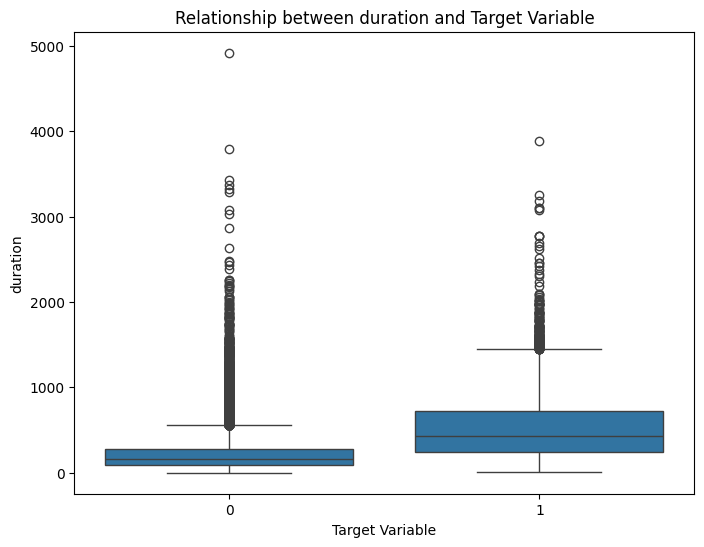

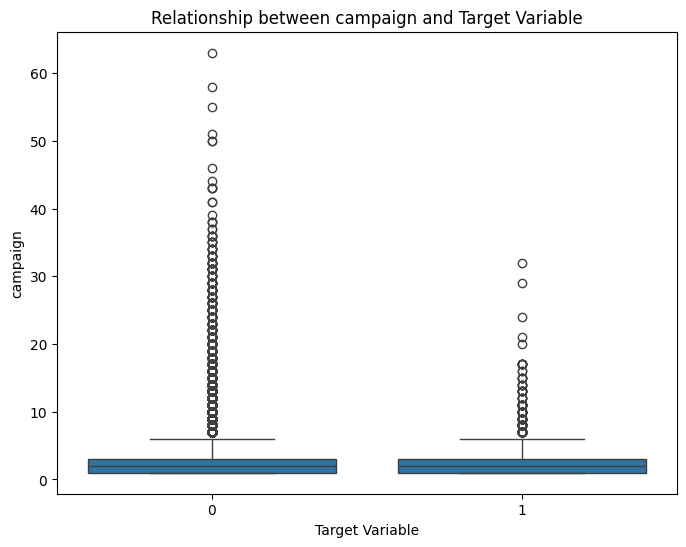

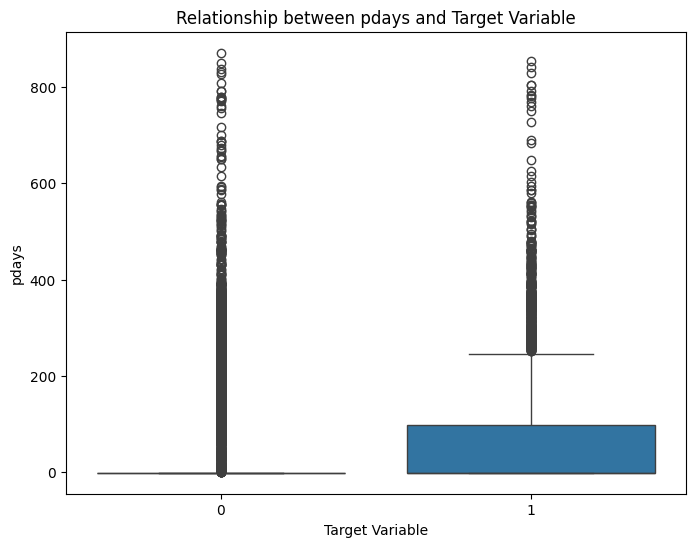

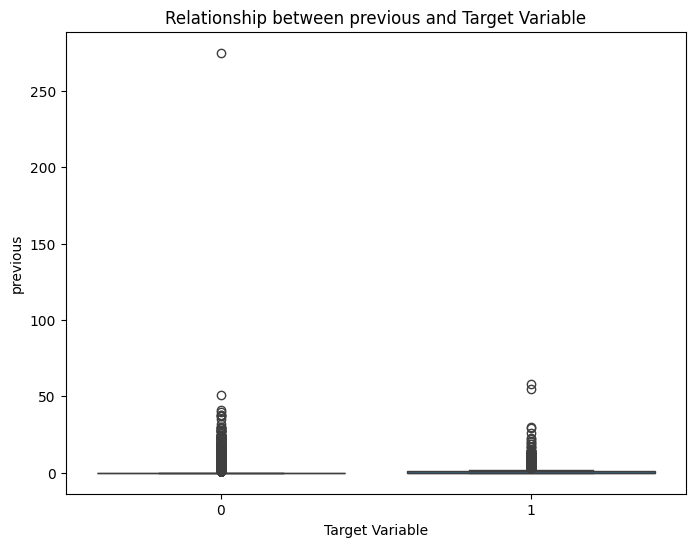

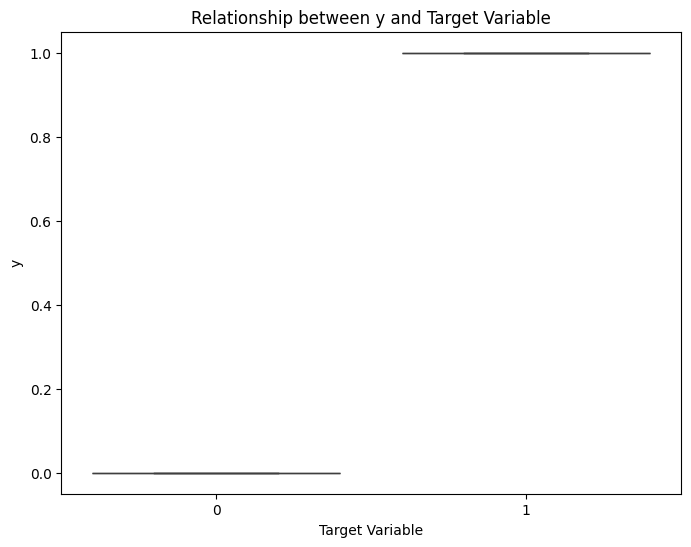

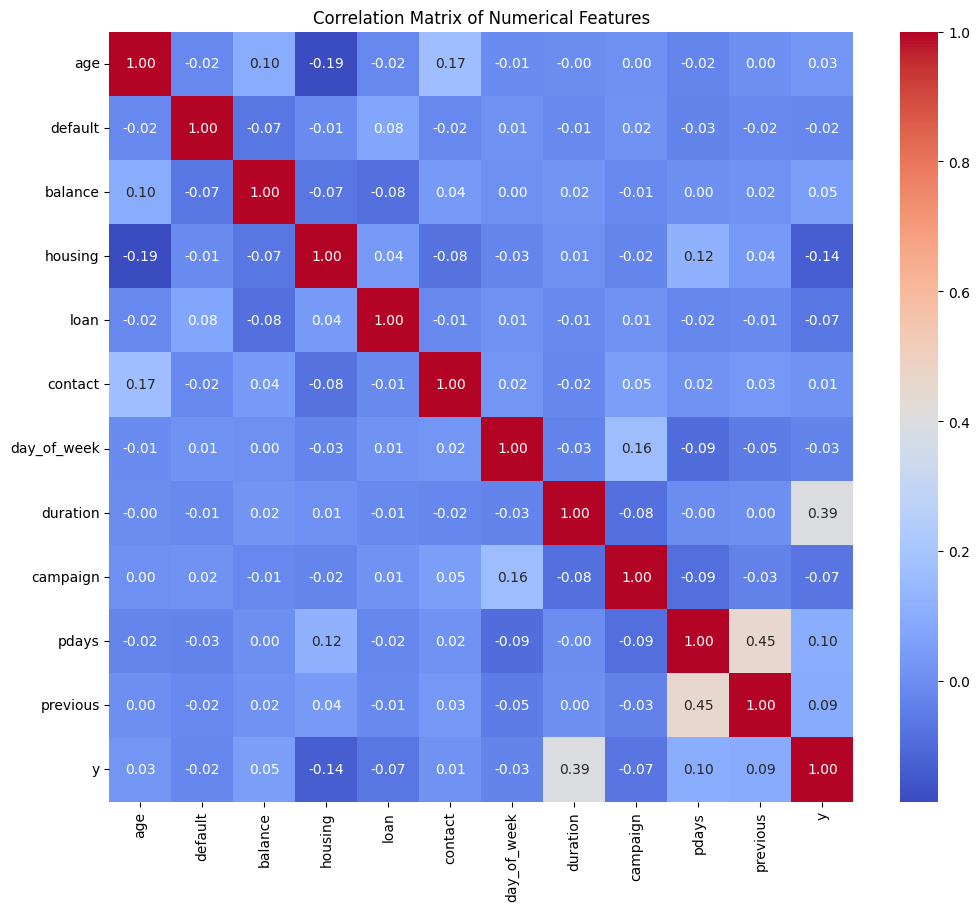

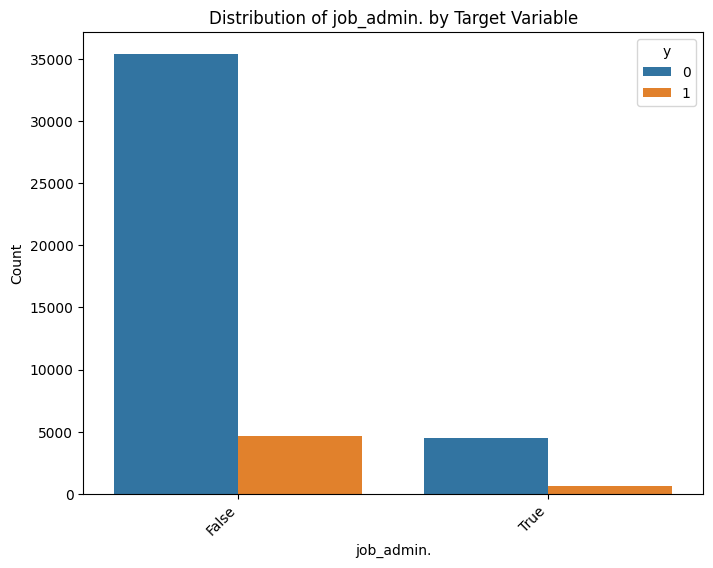

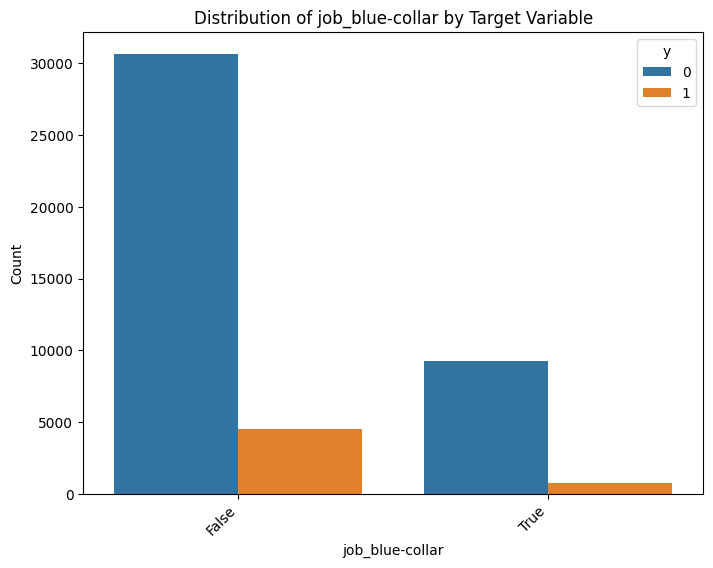

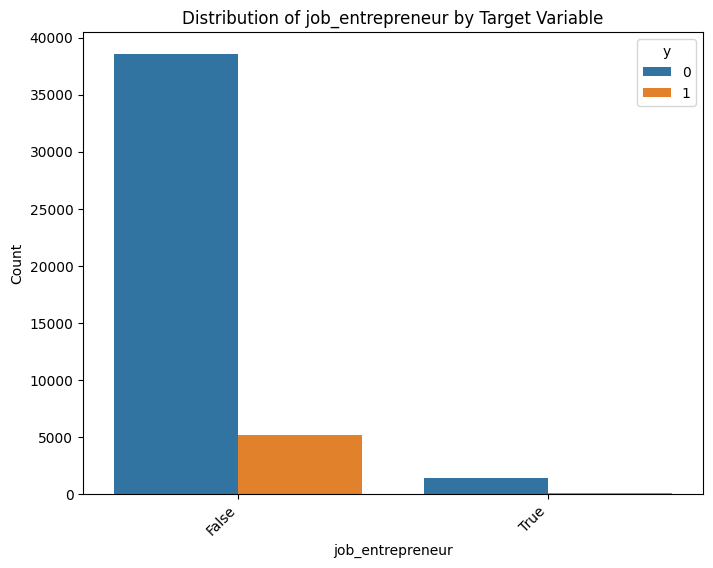

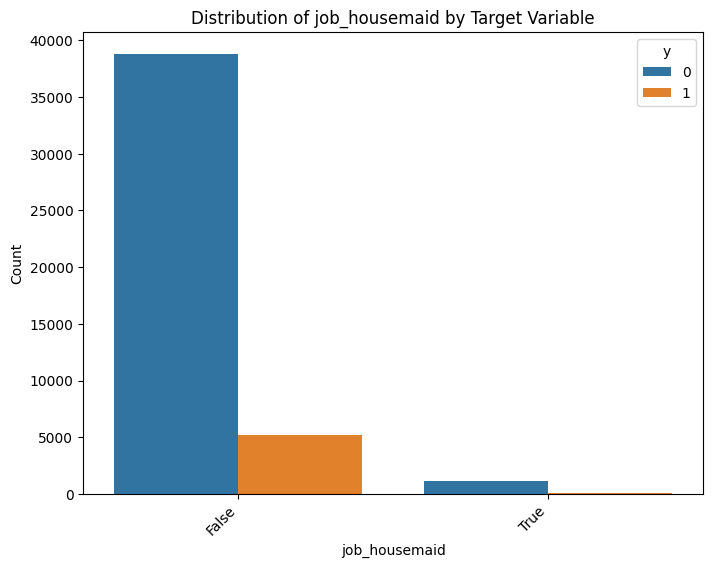

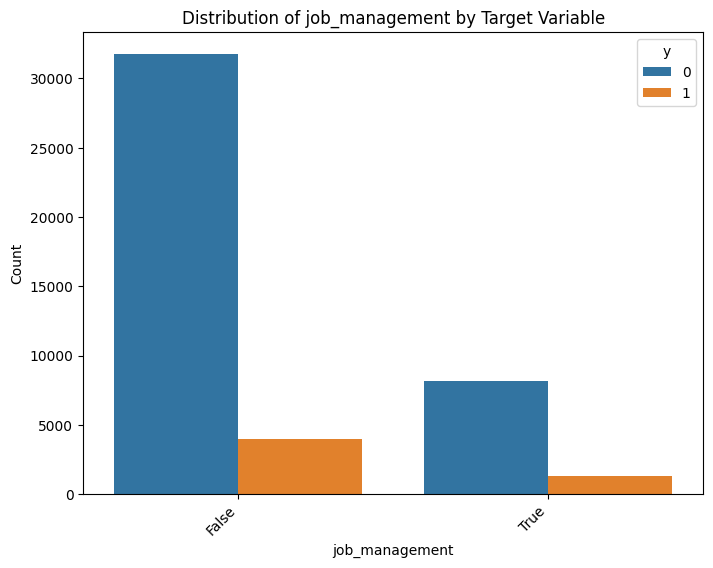

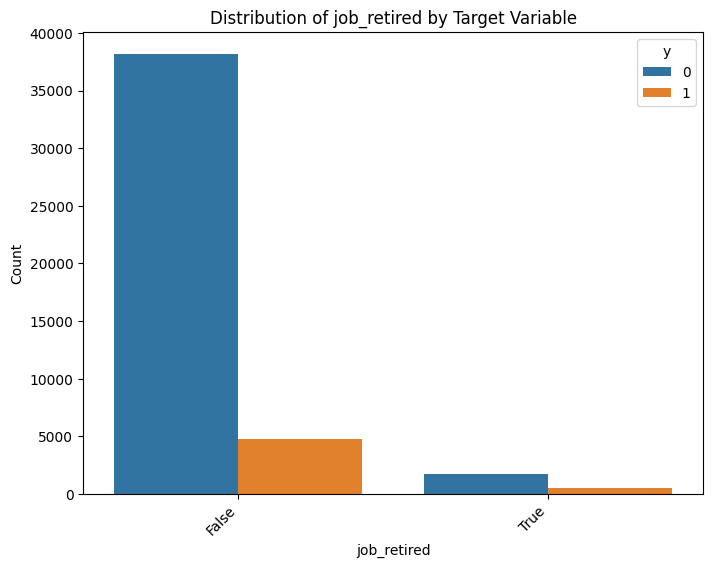

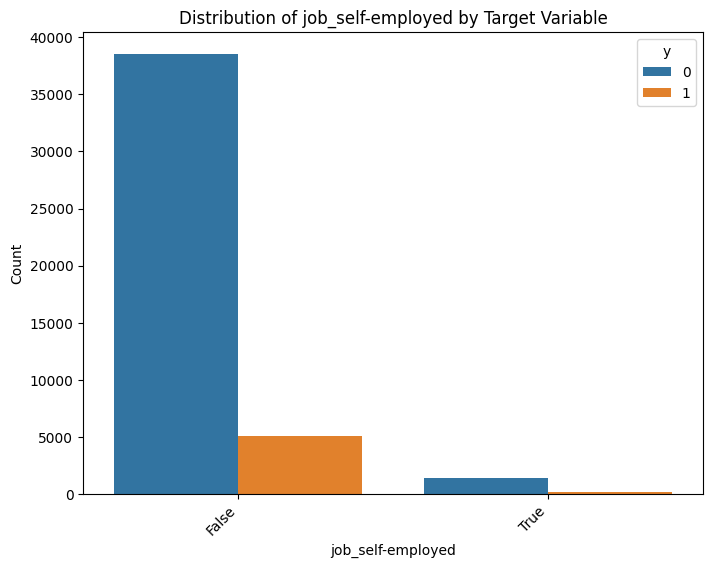

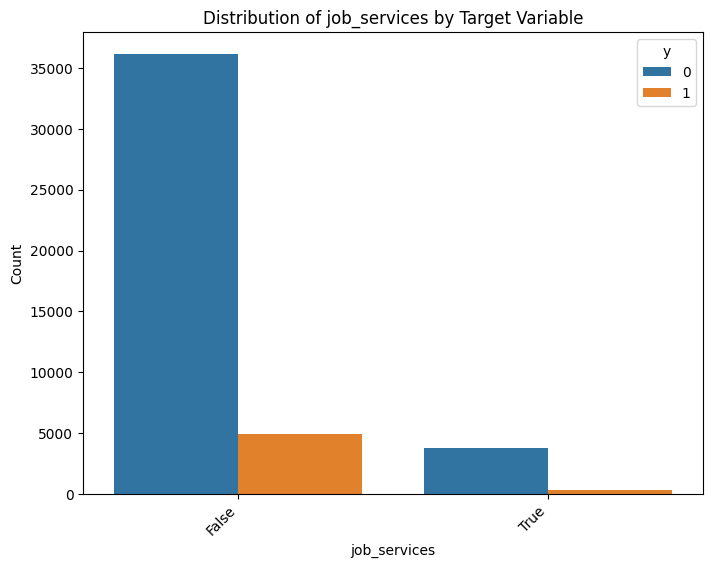

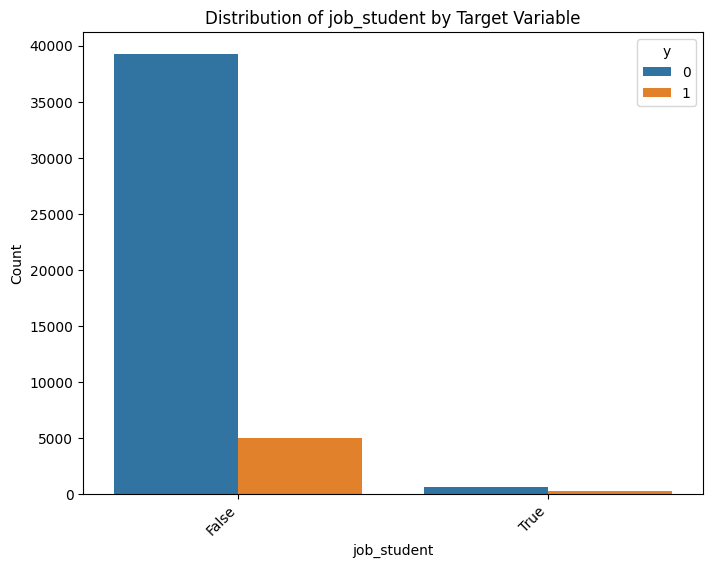

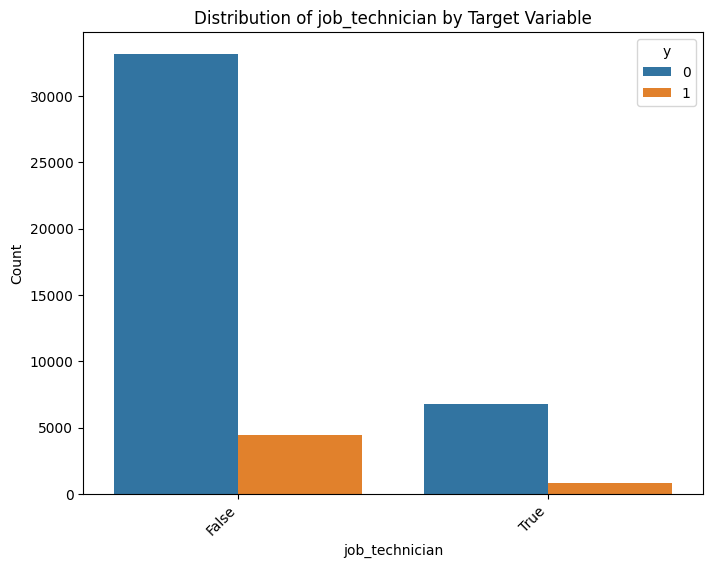

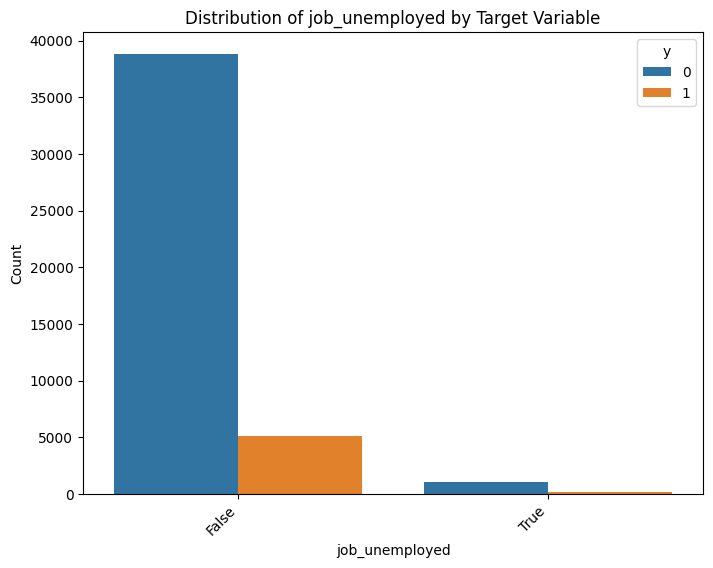

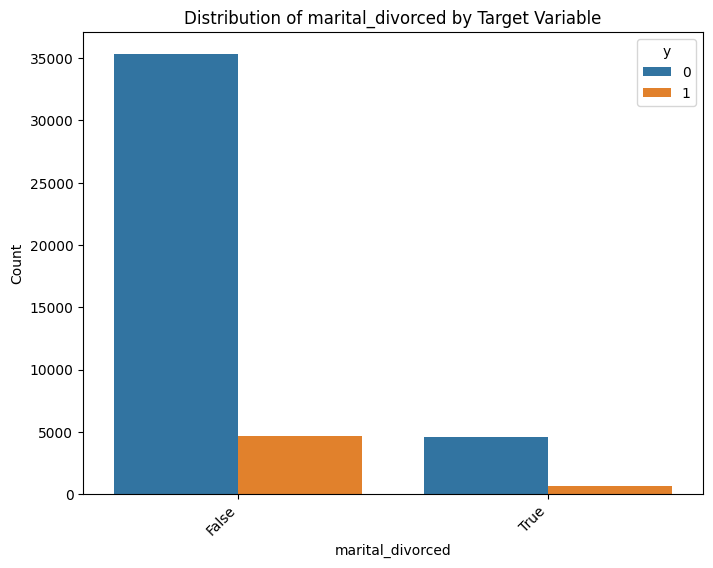

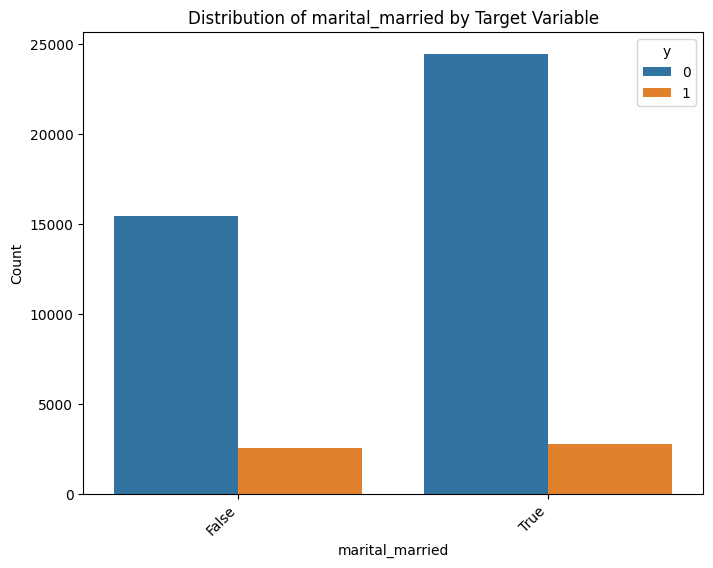

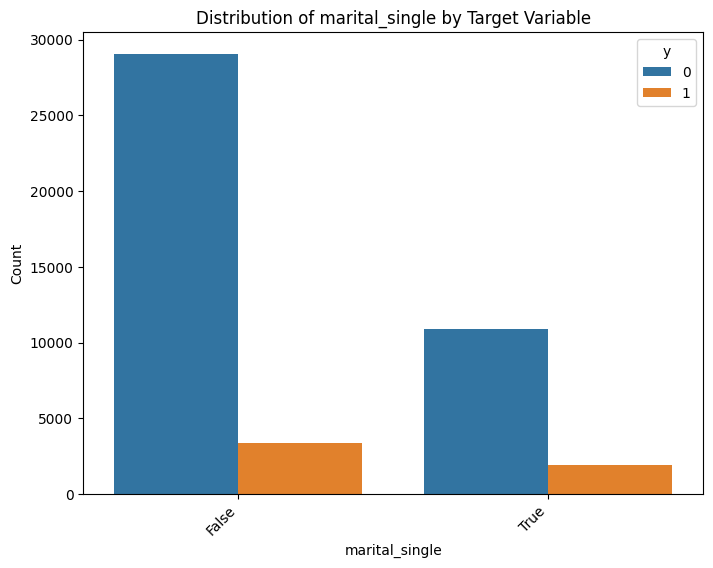

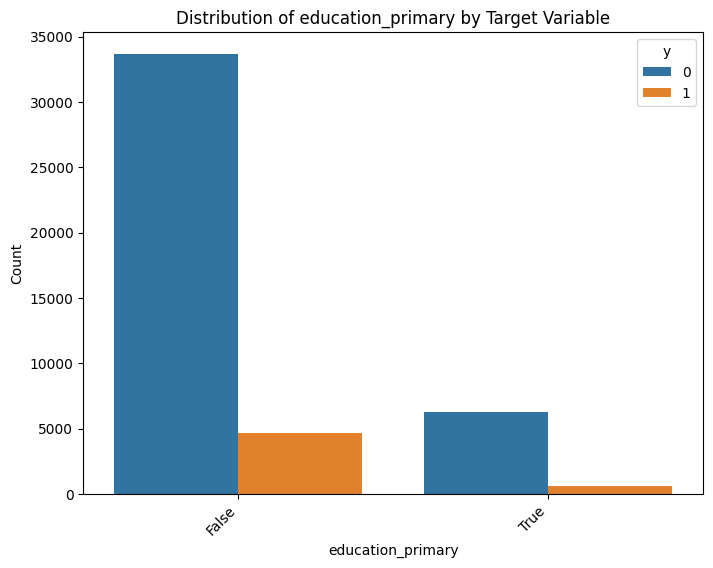

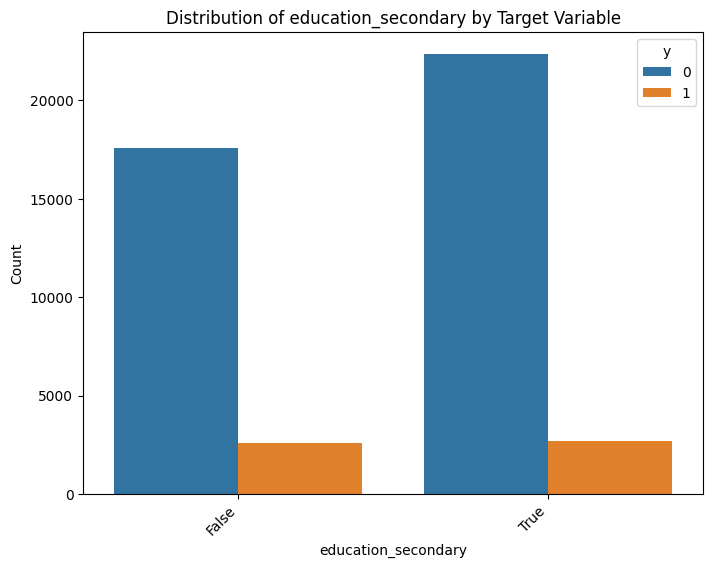

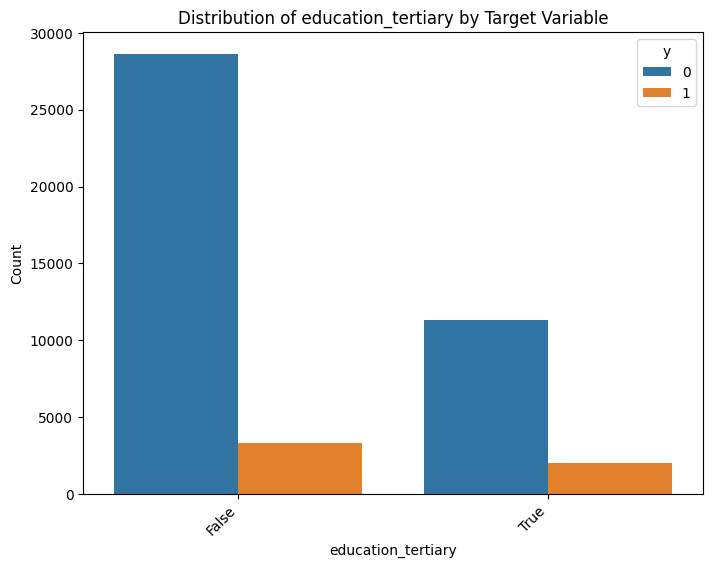

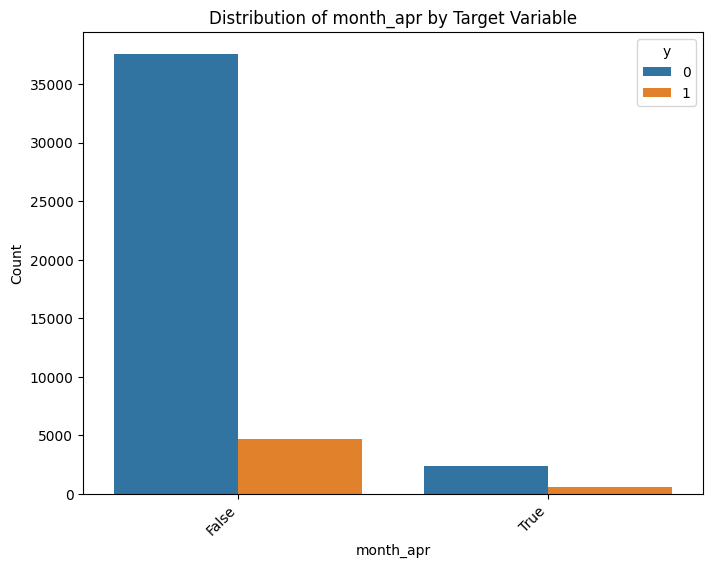

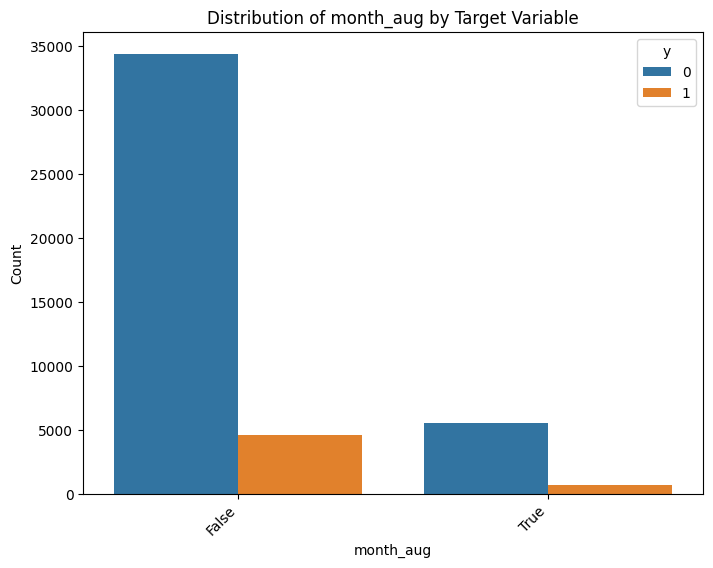

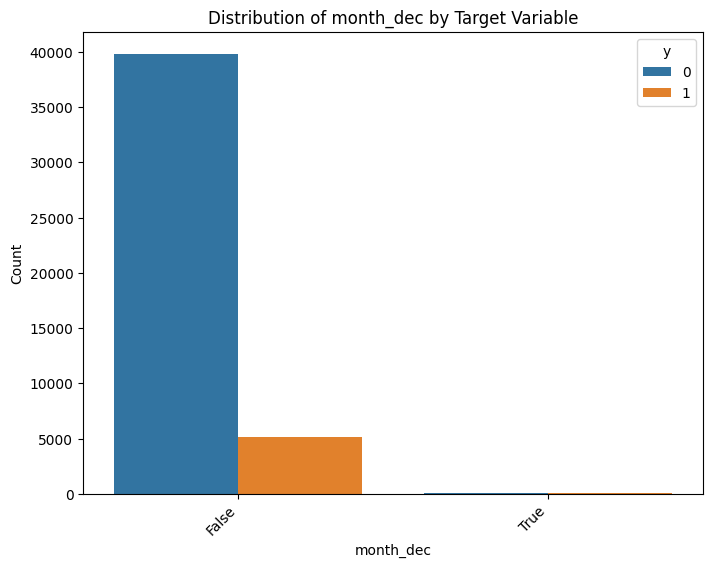

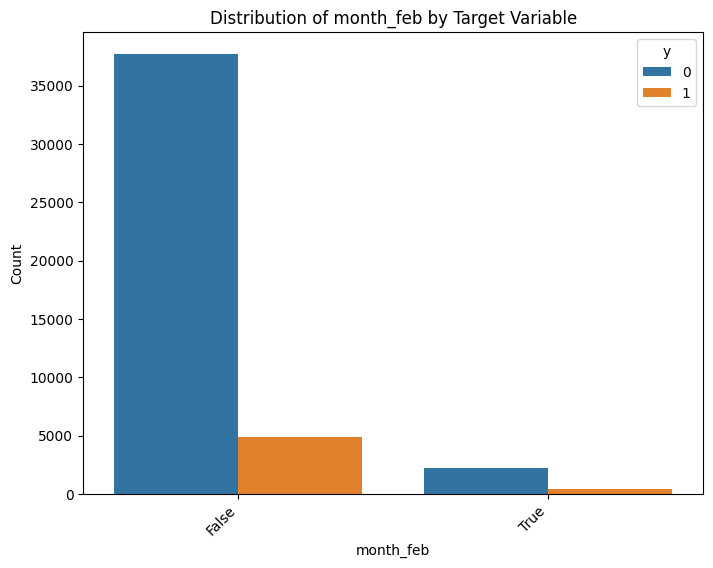

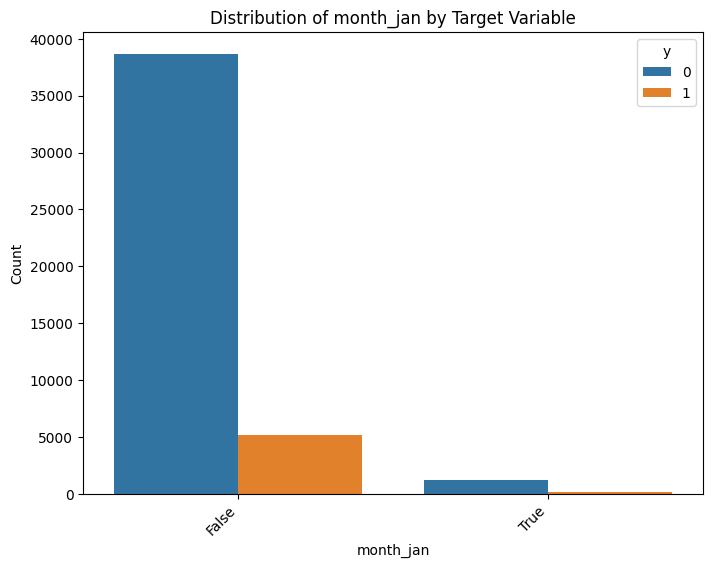

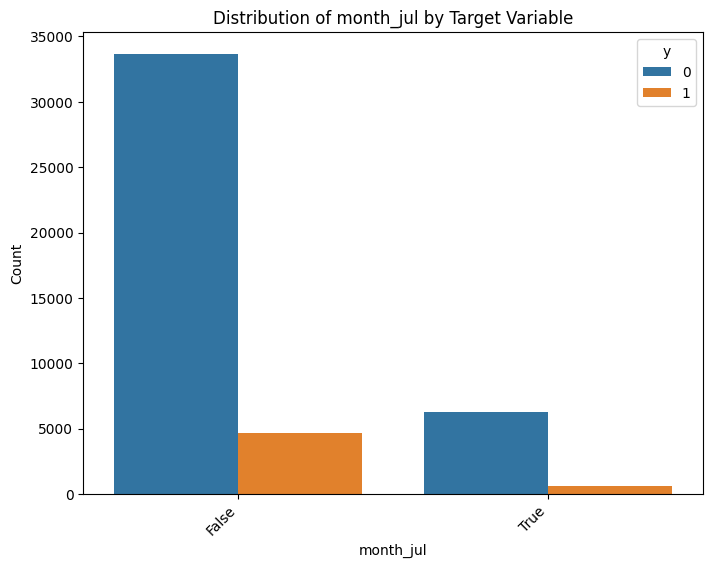

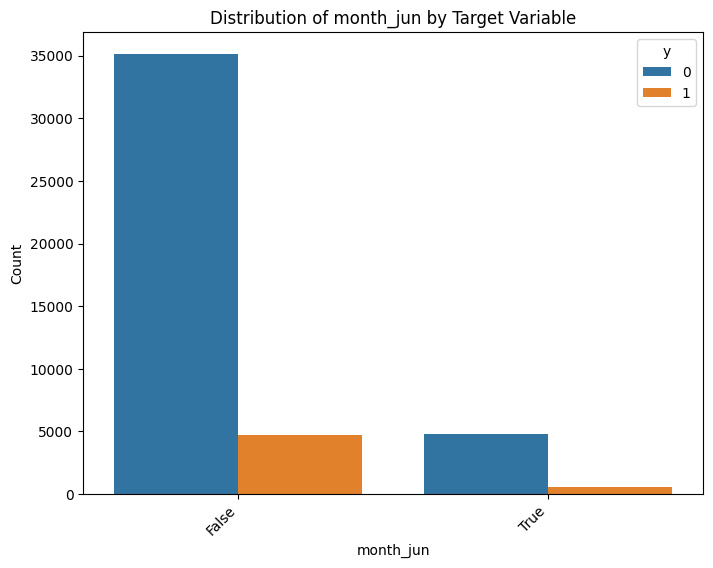

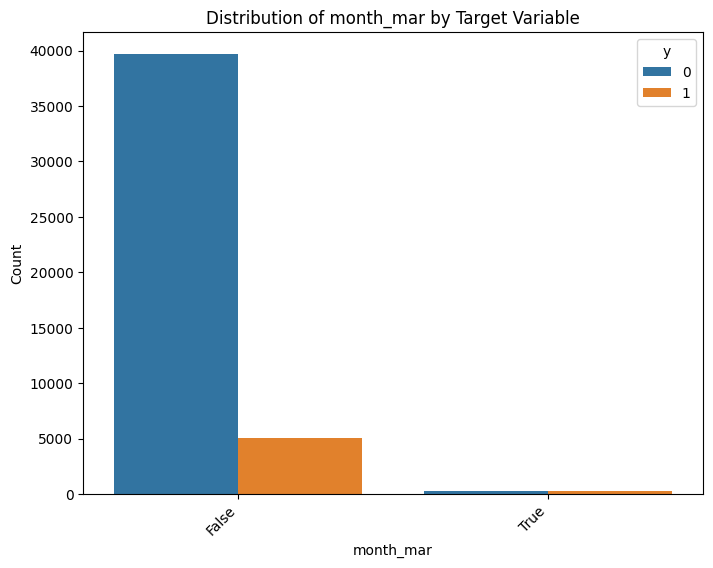

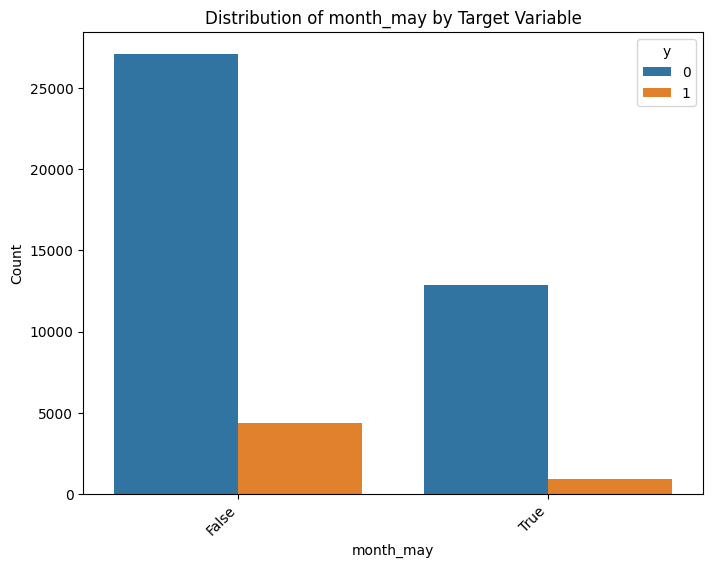

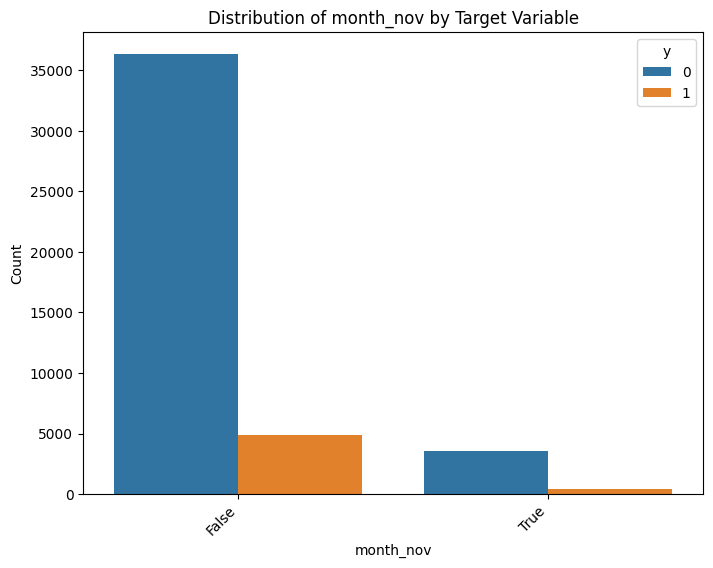

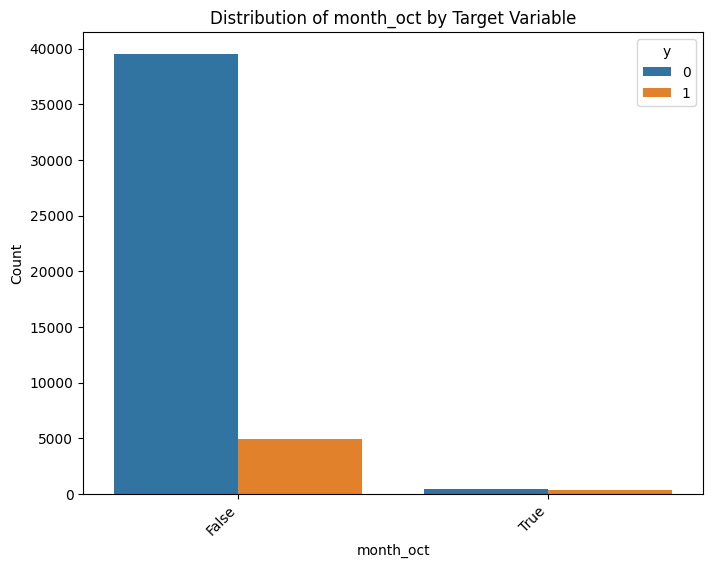

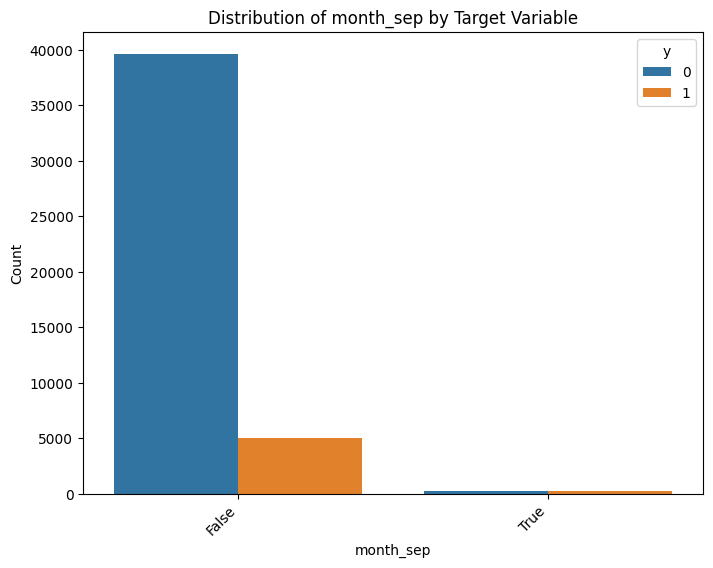

In [ ]:

# Visualize the distribution of numerical features
numerical_features = data.select_dtypes(include=['number'])
for col in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Visualize the relationship between numerical features and the target variable
for col in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='y', y=col, data=data)
    plt.title(f'Relationship between {col} and Target Variable')
    plt.xlabel('Target Variable')
    plt.ylabel(col)
    plt.show()

# Visualize the correlation matrix of numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Visualize the distribution of categorical features
categorical_features = data.select_dtypes(exclude=['number'])
for col in categorical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data, hue='y')
    plt.title(f'Distribution of {col} by Target Variable')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [ ]:
X= data.drop('y', axis=1)
y = data['y']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
joblib.dump(scaler, 'scaler.joblib')
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Dictionary of classification algorithms
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Extra Trees": ExtraTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gaussian Naive Baye": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1),  # Suppress LightGBM logs
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
    "Neural Network": MLPClassifier(random_state=42, max_iter=1000)

}


Training Logistic Regression...
Saved Logistic Regression model to trained_models/Logistic Regression.joblib
Logistic Regression Metrics:
Accuracy: 0.8909
Precision: 0.8707
Recall: 0.8909
F1 Score: 0.8716
----------------------------------------
Training Decision Tree...
Saved Decision Tree model to trained_models/Decision Tree.joblib
Decision Tree Metrics:
Accuracy: 0.8706
Precision: 0.8730
Recall: 0.8706
F1 Score: 0.8718
----------------------------------------
Training Extra Trees...
Saved Extra Trees model to trained_models/Extra Trees.joblib
Extra Trees Metrics:
Accuracy: 0.8550
Precision: 0.8538
Recall: 0.8550
F1 Score: 0.8544
----------------------------------------
Training Random Forest...
Saved Random Forest model to trained_models/Random Forest.joblib
Random Forest Metrics:
Accuracy: 0.9021
Precision: 0.8897
Recall: 0.9021
F1 Score: 0.8919
----------------------------------------
Training SVC...
Saved SVC model to trained_models/SVC.joblib
SVC Metrics:
Accuracy: 0.8949
Preci

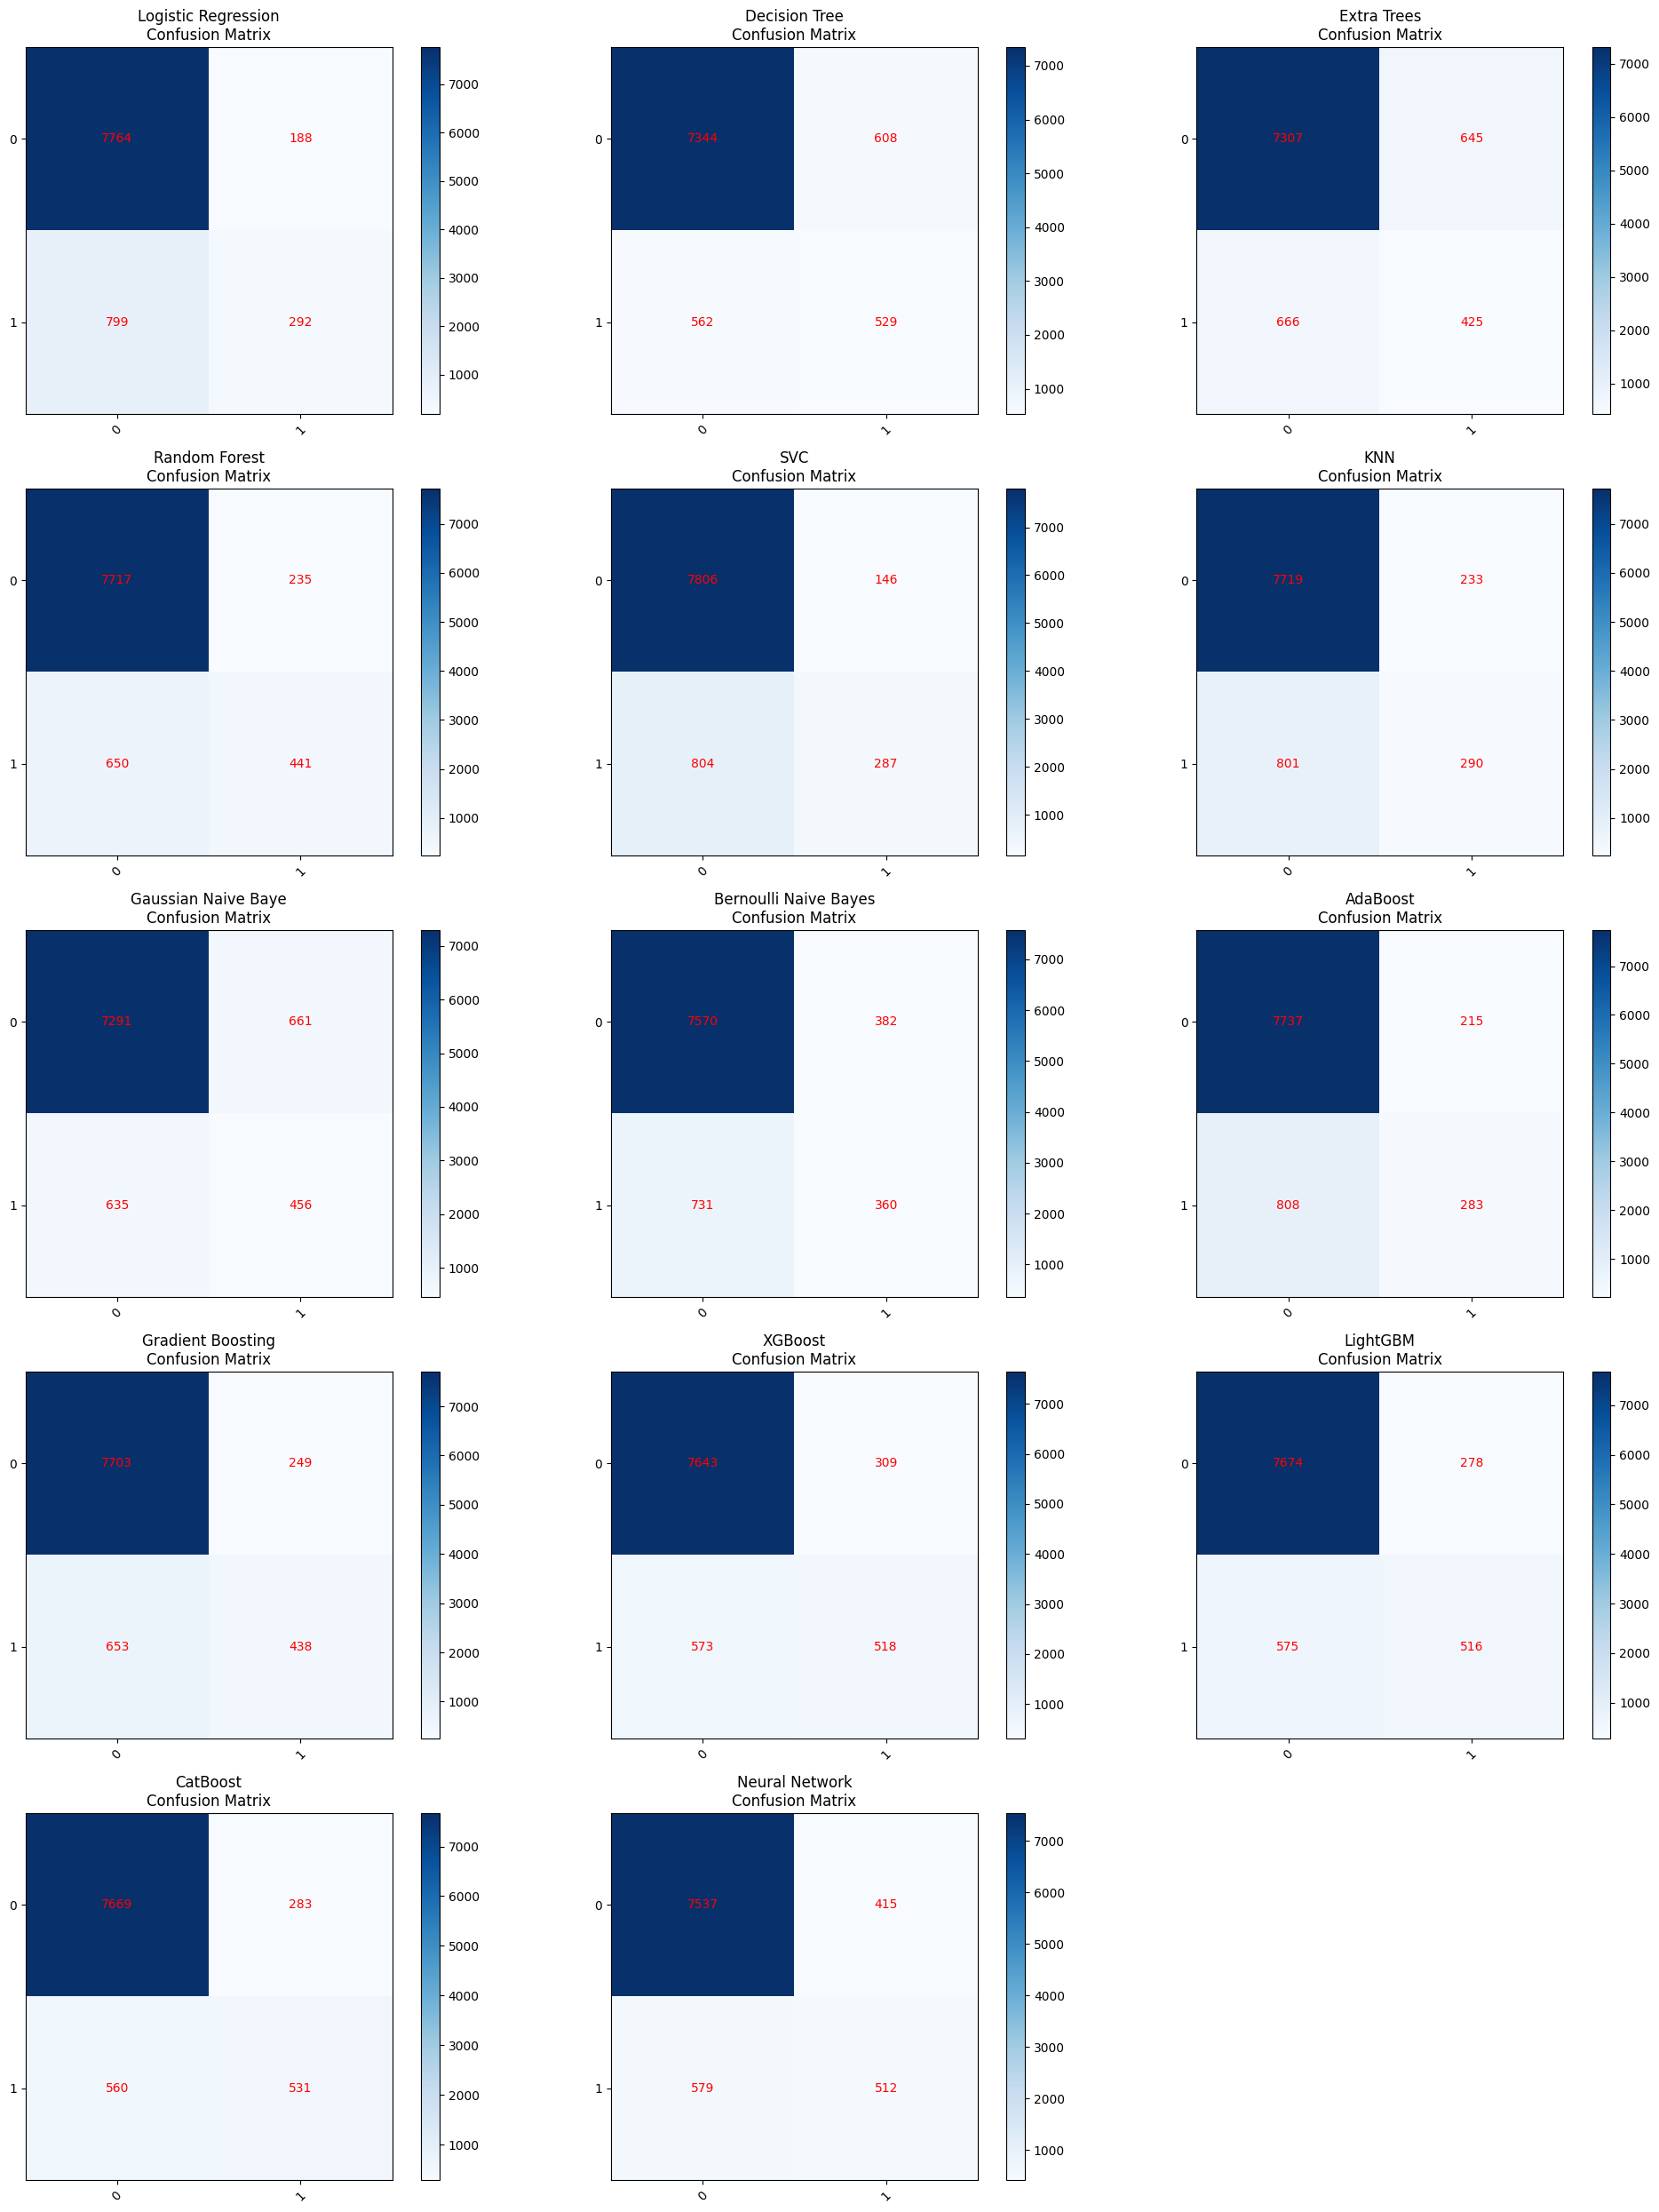

In [ ]:
models_dir = 'trained_models'
os.makedirs(models_dir, exist_ok=True)

# Initialize a figure for confusion matrices
num_classifiers = len(classifiers)
num_rows = int(np.ceil(num_classifiers / 3))  # Adjust columns as needed
num_cols = 3  # You can adjust this for a different layout

# Initialize a figure with enough subplots
plt.figure(figsize=(20, num_rows * 5))  # Adjust figure height dynamically

# Dictionary to store results for all models
results = {}

# Train and evaluate each classifier
for i, (name, model) in enumerate(classifiers.items()):
    print(f"Training {name}...")


    y_train_adjusted = y_train
    y_test_adjusted = y_test

    # Fit the model
    model.fit(X_train, y_train_adjusted)

    # Save the trained model
    model_filename = os.path.join(models_dir, f"{name}.joblib")
    joblib.dump(model, model_filename)
    print(f"Saved {name} model to {model_filename}")

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test_adjusted, y_pred)
    precision = precision_score(y_test_adjusted, y_pred, average='weighted')
    recall = recall_score(y_test_adjusted, y_pred, average='weighted')
    f1 = f1_score(y_test_adjusted, y_pred, average='weighted')

    # Store metrics in the results dictionary
    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": confusion_matrix(y_test_adjusted, y_pred)
    }

    # Print metrics
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)

    # Plot confusion matrix in a subplot
    cm = results[name]["confusion_matrix"]
    plt.subplot(num_rows, num_cols, i + 1)  # Use calculated rows and columns
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{name}\nConfusion Matrix")
    plt.colorbar()

    # Get the number of unique classes in the target variable
    num_classes = len(np.unique(y_test_adjusted))

    tick_marks = np.arange(num_classes)  # Use num_classes instead of hardcoding 7
    plt.xticks(tick_marks, np.unique(y_test_adjusted), rotation=45)  # Use unique class labels
    plt.yticks(tick_marks, np.unique(y_test_adjusted))  # Use unique class labels

    # Labeling the matrix - adjust loop ranges
    for j in range(cm.shape[0]):  # Iterate over actual classes (rows)
        for k in range(cm.shape[1]):  # Iterate over predicted classes (columns)
            plt.text(k, j, format(cm[j, k], 'd'), ha="center", va="center", color="red")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

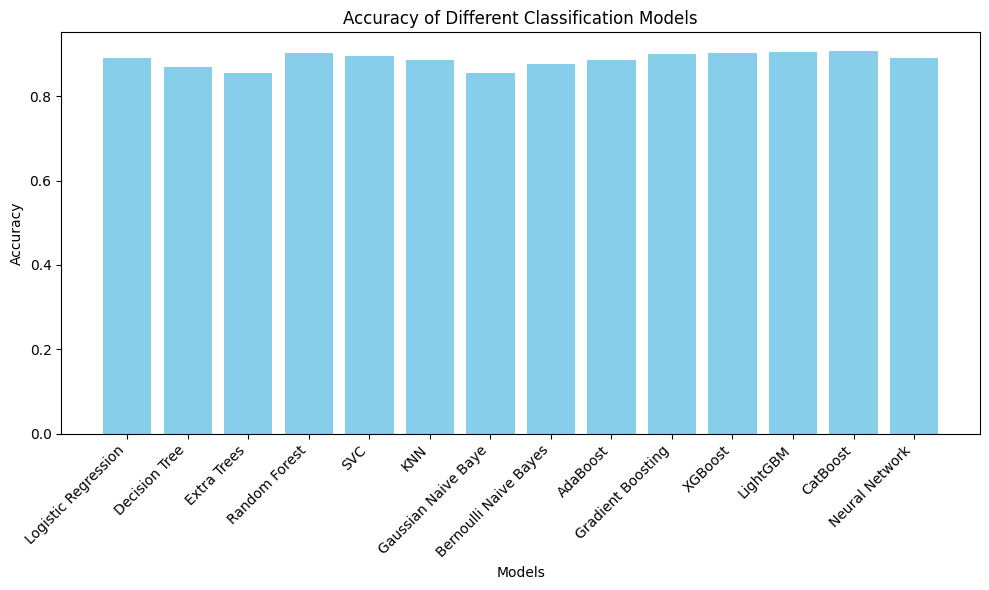

In [ ]:
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Classification Models")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

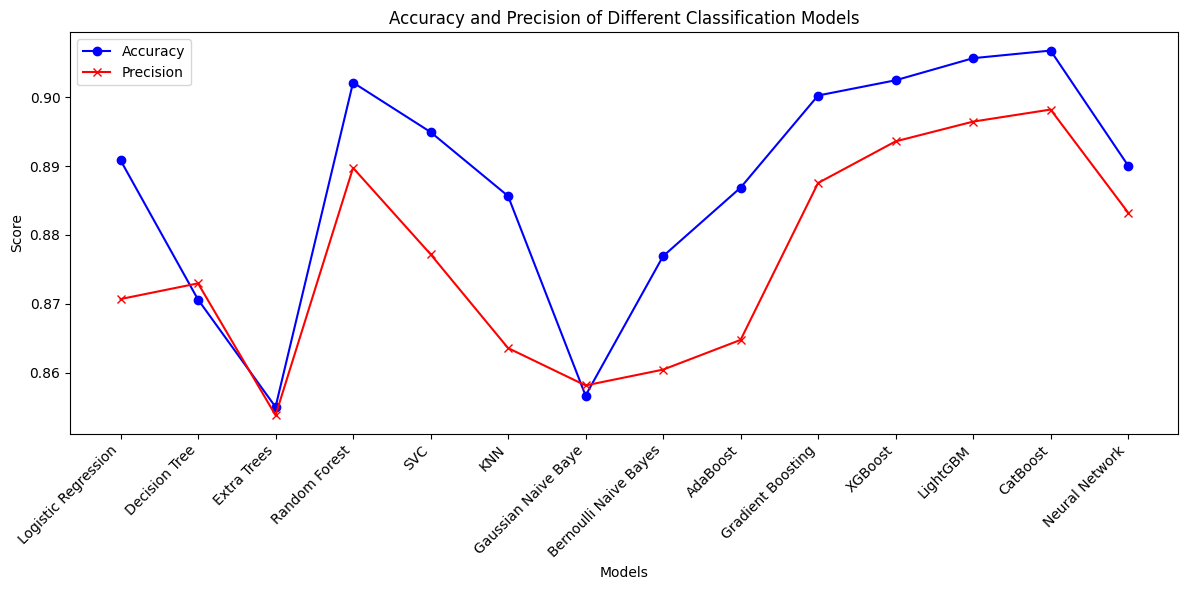

In [ ]:


# Assuming 'results' dictionary is already populated from the previous code
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]
precisions = [results[model]['precision'] for model in model_names]

plt.figure(figsize=(12, 6))

# Plot accuracies
plt.plot(model_names, accuracies, marker='o', label='Accuracy', color='blue')

# Plot precisions
plt.plot(model_names, precisions, marker='x', label='Precision', color='red')


plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Accuracy and Precision of Different Classification Models")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
if 'y' in columns_used_for_label_encoder:  # Check if 'y' is in the list
    columns_used_for_label_encoder.remove('y')

In [ ]:
columns_used_for_One_hot_encode

['job', 'marital', 'education', 'month']

In [ ]:


def preprocess_new_data(new_record):
    # Convert the new record to a DataFrame
    new_record_df = new_record.copy()

    # Preprocessing steps (replicate the training preprocessing)
    for col in columns_used_for_label_encoder:
        le = joblib.load(f'label_encoder_{col}.joblib')
        new_record_df[col] = le.transform(new_record_df[col])

    # Perform one-hot encoding for all columns at once outside the loop
    new_record_df = pd.get_dummies(new_record_df, columns=columns_used_for_One_hot_encode)

    # Ensure all columns from training are present
    for c in X.columns: # Use X.columns for training data columns
        if c not in new_record_df.columns:
            new_record_df[c] = 0

    # Align columns with the training data
    new_record_df = new_record_df[X.columns]  # Use X.columns for training data columns

    scaler = joblib.load('scaler.joblib')
    new_record_scaled = scaler.transform(new_record_df)

    return new_record_scaled

# Example usage (replace with actual new record):
new_record = pd.DataFrame({
    'age': [30],
    'job': ['admin.'],
    'marital': ['married'],
    'education': ['secondary'],
    'default': ['no'],
    'balance': [1000],
    'housing': ['yes'],
    'loan': ['no'],
    'contact': ['cellular'],
    'day_of_week': [5],
    'month': ['may'],
    'duration': [300],
    'campaign': [2],
    'pdays': [-1],
    'previous': [0]
})

def preprocess_new_data(new_record):
    # Convert the new record to a DataFrame
    new_record_df = new_record.copy()

    # Preprocessing steps (replicate the training preprocessing)
    for col in columns_used_for_label_encoder:
        le = joblib.load(f'label_encoder_{col}.joblib')
        new_record_df[col] = le.transform(new_record_df[col])

    # Perform one-hot encoding for all columns at once outside the loop
    new_record_df = pd.get_dummies(new_record_df, columns=columns_used_for_One_hot_encode)

    # Ensure all columns from training are present
    for c in X.columns: # Use X.columns for training data columns
        if c not in new_record_df.columns:
            new_record_df[c] = 0

    # Align columns with the training data
    new_record_df = new_record_df[X.columns]  # Use X.columns for training data columns

    scaler = joblib.load('scaler.joblib')
    new_record_scaled = scaler.transform(new_record_df)

    return new_record_scaled

In [ ]:


# Load all saved models
models_dir = 'trained_models'
loaded_models = {}
for filename in os.listdir(models_dir):
    if filename.endswith(".joblib"):
        model_name = filename[:-7]  # Remove ".joblib" extension
        model_path = os.path.join(models_dir, filename)
        loaded_models[model_name] = joblib.load(model_path)

# Make predictions using all loaded models
predictions = {}
for model_name, model in loaded_models.items():
    try:
        predictions[model_name] = model.predict(new_record_processed)
    except ValueError as e:
        print(f"Error predicting with {model_name}: {e}")
        predictions[model_name] = np.nan  # Or handle the error differently

predictions

{'Gaussian Naive Baye': array([0]),
 'LightGBM': array([0]),
 'AdaBoost': array([0]),
 'KNN': array([0]),
 'Random Forest': array([0]),
 'Bernoulli Naive Bayes': array([0]),
 'Extra Trees': array([0]),
 'SVC': array([0]),
 'Logistic Regression': array([0]),
 'Neural Network': array([0]),
 'XGBoost': array([0]),
 'Decision Tree': array([0]),
 'CatBoost': array([0]),
 'Gradient Boosting': array([0])}